## Stacks batch 8 final - Filter by Ho, MLrelate
<br>
<br>
This notebook contains steps to... 

1. Remove individuals found to be contaminated in previous analyses of AK (Drinan et al. 2018), KOR (MS Thesis Chapt. 1)
2. Check heterozygosity v. read depth
3. Remove additional Alaskan samples
4. Choose replicates to keep in Korean samples based on heterozygosity, missing data. 

### 1. remove known contaminated individuals

In [1]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks/batch8_pipeline'

In [2]:
cd ../../

/mnt/hgfs/PCod-Compare-repo


In [5]:
infile = open("stacks_b8_wgenome_r05/batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_genepop.txt", "r")
samplefile = open("scripts/Batch_8_verif_Samples_Contam_removed.txt", "r")
outfile = open("stacks_b8_wgenome_r05/batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_filteredC1_genepop.txt", "w")

## get list of samples to remove
count = 0
samples_to_remove = []
for line in samplefile:
    if not line.startswith("#"):
        samples_to_remove.append(line.strip())
        count += 1
samplefile.close()
print "Removing ", count, " samples from file."

## remove those samples from genepop and write to new file
keep = 0
line = infile.readline()
while not line.startswith("Pop"):
    outfile.write(line)
    line = infile.readline()
outfile.write(line)
for line in infile:
    if line.startswith("Pop"):
        outfile.write(line)
    else:
        sample = line.strip().split()[0].strip(",")
        if sample not in samples_to_remove:
            outfile.write(line)
            keep += 1
print "Wrote ", keep, " samples to new file."
infile.close()
outfile.close()

Removing  35  samples from file.
Wrote  611  samples to new file.


**Samples removed:**

PO010715_26, GE012315_09.1, GE012315_09_2, GE012315_11_2, GE011215_30.1, GE012315_11.1, NA021015_06_2, NA021015_09_2, NA021015_10_2, NA021015_13.1, NA021015_06.1, NA021015_10.1, NA021015_09.1, GE012315_04.1, YS_121316_20.1, YS121315_14.1, YS121315_14_2, BOR07_10.1, GE012315_10.1, NA021015_03.1


AD06_011
KOD03_063
SS12_014
UP03_001
UP03_006
WC05_017
AD06_044
HS04_015
KOD03_064
KOD03_066
SS12_015
UP03_014
WC05_012
WC05_015


In [6]:
!python analyses/calc_het.py -h

usage: calc_het.py [-h] [-l LIST] [-i IND] [-f FILE] [-o OUTPUT]
                   [-d DENOMINATOR]

optional arguments:
  -h, --help            show this help message and exit
  -l LIST, --list LIST  Population map, or any white space delimited list of
                        individuals with sample name in first column
  -i IND, --ind IND     name of individual to investigate (mutually exclusive
                        to '-l' and requires '-f') - UNTESTED
  -f FILE, --file FILE  location of file with genotypes (assumes genepop
                        format)
  -o OUTPUT, --output OUTPUT
                        name of output file
  -d DENOMINATOR, --denominator DENOMINATOR
                        use 2 if counting a FASTA file or 4 if counting a
                        FASTQ file


In [10]:
!python analyses/calc_het.py -l scripts/PopMap_combo_b8_filterIndividsC.txt \
-f stacks_b8_wgenome_r05/batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_filteredC1_genepop.txt \
-o analyses/Het_Depth_MissingData_b8_final.txt \
-d 4

In [11]:
!python analyses/calc_missing_genotypes.py \
-l scripts/PopMap_combo_b8_filterIndividsC.txt \
-f stacks_b8_wgenome_r05/batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_filteredC1_genepop.txt \
-o MissingData_b8_final.txt \
-d 4

In [ ]:
## run in terminal
!python analyses/calcReadDepth.py \
-l scripts/samples_for_hetdepth.txt \
-o batch_8_final_depth.txt \
-d 4

### 2. check heterozygosity, read depth, missing data

#### 3/14/2018

In [29]:
cd analyses

/mnt/hgfs/PCod-Compare-repo/analyses


In [30]:
## open file and save each number into appropriate list ##
infile = open("Het_Depth_MissingData_b8_final.txt", "r")
het_dict = {}
het = []
missing = []
depth = []
infile.readline()
for line in infile:
    linelist = line.strip().split()
    het_dict[linelist[0]] = float(linelist[1])
    het.append(float(linelist[1]))
    missing.append(float(linelist[2]))
    depth.append(float(linelist[3]))
infile.close()

In [32]:
## create color vector to distinguish Korea and Alaska individuals
colors = ["cyan"] * 288
for i in range(1,324):
    colors.append("purple")

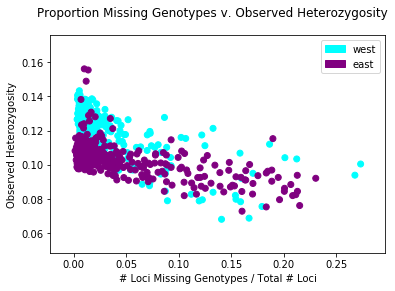

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
leg_kor = mpat.Patch(color="cyan", label="west")
leg_ak = mpat.Patch(color="purple", label="east")
plt.scatter(missing, het, color = colors)
plt.suptitle("Proportion Missing Genotypes v. Observed Heterozygosity")
plt.xlabel("# Loci Missing Genotypes / Total # Loci")
plt.ylabel("Observed Heterozygosity")
plt.legend(handles=[leg_kor,leg_ak])
plt.show()

In [34]:
plt.close()

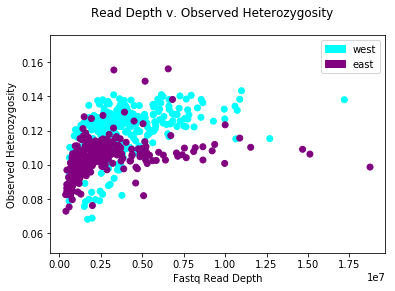

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
leg_kor = mpat.Patch(color="cyan", label="west")
leg_ak = mpat.Patch(color="purple", label="east")
plt.scatter(depth, het, color = colors)
plt.suptitle("Read Depth v. Observed Heterozygosity")
plt.xlabel("Fastq Read Depth")
plt.ylabel("Observed Heterozygosity")
plt.legend(handles=[leg_kor,leg_ak])
plt.show()

In [36]:
plt.close()

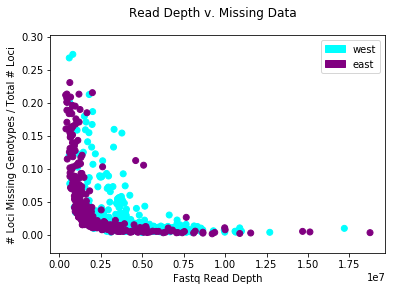

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
leg_kor = mpat.Patch(color="cyan", label="west")
leg_ak = mpat.Patch(color="purple", label="east")
plt.scatter(depth, missing, color = colors)
plt.suptitle("Read Depth v. Missing Data")
plt.xlabel("Fastq Read Depth")
plt.ylabel("# Loci Missing Genotypes / Total # Loci")
plt.legend(handles=[leg_kor,leg_ak])
plt.show()

In [38]:
plt.close()

### 3. remove individuals flagged in this round of stacks

#### PART 1. HETEROZYGOSITY

#### Individuals with higher heterozygosity

| Individual | Ho | % Missing | 
|:----------:|:---:|:--------:|
|PS12_015|	0.156061145 | 0.010029914|
|PS12_014|	0.155396967	|0.013725145
|UP03_044| 0.148860399	| 0.011789548

<br>

PS12_015 was SS12_015; filtered out in Gruenthal et al. (2018)
<br>
PS12_014 was SS12_014; filtered out in Gruenthal et al. (2018)
<br>
UP03_44 was flagged in Gruenthal et al. (2018) but not removed because was not adjacent on the same plate as the related sample. I will remove this one anyway. 


In [40]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/analyses'

In [41]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [6]:
infile = open("stacks_b8_wgenome_r05/batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_genepop.txt", "r")
samplefile = open("scripts/Batch_8_verif_Samples_Contam_removed.txt", "r")
outfile = open("stacks_b8_wgenome_r05/batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_filteredC2_genepop.txt", "w")

## get list of samples to remove
count = 0
samples_to_remove = []
for line in samplefile:
    if not line.startswith("#"):
        samples_to_remove.append(line.strip())
        count += 1
samplefile.close()
print "Removing ", count, " samples from file."

## remove those samples from genepop and write to new file
keep = 0
line = infile.readline()
while not line.startswith("Pop"):
    outfile.write(line)
    line = infile.readline()
outfile.write(line)
for line in infile:
    if line.startswith("Pop"):
        outfile.write(line)
    else:
        sample = line.strip().split()[0].strip(",")
        if sample not in samples_to_remove:
            outfile.write(line)
            keep += 1
print "Wrote ", keep, " samples to new file."
infile.close()
outfile.close()

Removing  38  samples from file.
Wrote  609  samples to new file.


#### PART 2. MLrelate

Note that I only ran Alaskan samples through MLrelate, because these are the only samples for which I expect new samples to be flagged from previous work. This is because I was not a part of the filtering process in prior analyses and because some of the samples were renamed. 

I used one input file with two populations: one population was the coastal samples, and the other were the salish sea samples.

In [44]:
cd analyses

/mnt/hgfs/PCod-Compare-repo/analyses


In [45]:
infile = open("mlrelate_ak_output.txt", "r")
outfile = open("MLrelate_ak_relatedIndivids.txt", "w")

outfile.write("relatedness\tsample1\tsample2\n")

for line in infile:
    if line.startswith("Ind1"):
        break

r_count = 0
u_count = 0

halfsibs = ""
hs_count = 0
fullsibs = ""
fs_count = 0
for line in infile:
    linelist = line.strip().split()
    if len(linelist) > 2:
        relate = linelist[2]
        if relate == "HS":
            halfsibs += relate + "\t" + linelist[0] + "\t" + linelist[1] + "\n"
            r_count += 1
            hs_count += 1
        elif relate == "FS":
            fullsibs += relate + "\t" + linelist[0] + "\t" + linelist[1] + "\n"
            r_count += 1
            fs_count += 1
        else:
            u_count += 1
infile.close()

outfile.write(fullsibs)
outfile.write(halfsibs)
outfile.close()

print r_count, " detected related pairs: ", hs_count, " half sib pairs & ", fs_count, " full sib pairs."
print u_count, " unrelated pairs"

34  detected related pairs:  32  half sib pairs &  2  full sib pairs.
1857  unrelated pairs


I added the following samples to remove: 

|relationship |sample ID 1 | sample ID 2 | sample removed | why |
|:---:|:---:|:---:|:---:|:-----:|
|FS	|GS13_006	|GS13_003|GS13_003| duplicate sample; chose lower missing data |
|FS	|PS12_017	|PS12_016|GS13_006| duplicate sample; chose lower missing data |

#### PART 3. REPLICATES

This only includes the Korean samples

In [47]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [7]:
infile = open("stacks_b8_wgenome_r05/batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_genepop.txt", "r")
samplefile = open("scripts/Batch_8_verif_Samples_Contam_Rep_removed.txt", "r")
outfile = open("stacks_b8_wgenome_r05/batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_filteredCR_genepop.txt", "w")

## get list of samples to remove
count = 0
samples_to_remove = []
for line in samplefile:
    if not line.startswith("#"):
        samples_to_remove.append(line.strip())
        count += 1
samplefile.close()
print "Removing ", count, " samples from file."

## remove those samples from genepop and write to new file
keep = 0
line = infile.readline()
while not line.startswith("Pop"):
    outfile.write(line)
    line = infile.readline()
outfile.write(line)
for line in infile:
    if line.startswith("Pop"):
        outfile.write(line)
    else:
        sample = line.strip().split()[0].strip(",")
        if sample not in samples_to_remove:
            outfile.write(line)
            keep += 1
print "Wrote ", keep, " samples to new file."
infile.close()
outfile.close()

Removing  73  samples from file.
Wrote  574  samples to new file.


<br>
<br>

### Final Genepop file:
batch_8_filteredMAF_filteredIndivids30_filteredLoci30_filteredHWE_filteredCR_genepop.txt

### Final number loci:
5,684

### Final number individuals: 
western (Korea) samples: 307
<br>
eastern (US/CAN) samples: 312